In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas

In [7]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
#         name = data_['商品名称']
#         list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['店铺ID'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [8]:
lujing = '七夕订单.csv'
code = 'gbk'
data = improt_data(lujing,code)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [9]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）
0,\t20200824-20200826,2270353966510833,2020-08-24 11:39:36\t,6秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,否,359.0,125.0,0.0,234.0,七夕预售玫瑰专区\t,与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】,NaN,69,1,359.0,125.0,234.0,234.0,0.0,否,0,0.0,0.0,0.0,是,购买与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】原价359.0元现价128....,否,未回复,NaN,0.00分,0.0,2020-08-24 21:39:33\t,NaN
1,\t20200824-20200826,2270351601381307,2020-08-24 11:39:53\t,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,359.0,125.0,0.0,234.0,七夕预售玫瑰专区\t,与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】,NaN,69,1,359.0,125.0,234.0,234.0,0.0,否,0,0.0,0.0,0.0,是,购买与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】原价359.0元现价128....,否,已回复,NaN,0.00分,0.0,2020-08-25 13:15:46\t,NaN
2,\t20200824-20200826,2270352024161140,2020-08-24 13:27:22\t,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,389.0,145.9,0.1,243.0,七夕特惠11专区\t,给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节鲜花花束】,NaN,947,1,389.0,145.9,243.1,243.0,0.1,否,0,0.0,0.0,0.0,是,用户使用了会员红包减10.1元/购买给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节鲜花花束...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:33:53\t,NaN
3,\t20200824-20200826,2270352800320932,2020-08-24 16:18:07\t,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,389.0,146.0,0.0,243.0,七夕特惠11专区\t,陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】,NaN,938,1,389.0,146.0,243.0,243.0,0.0,否,0,0.0,0.0,0.0,是,购买陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】原价389.0元现价149.0元/门店新客立减...,否,未回复,NaN,0.00分,0.0,2020-08-25 21:21:40\t,NaN
4,\t20200824-20200826,2270352620144691,2020-08-24 18:34:19\t,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,499.0,226.0,0.0,273.0,七夕特惠33专区\t,体贴【33枝香槟玫瑰搭配相思梅七夕情人节鲜花花束】,NaN,323,1,499.0,226.0,273.0,273.0,0.0,否,0,0.0,0.0,0.0,是,购买体贴【33枝香槟玫瑰搭配相思梅七夕情人节鲜花花束】原价499.0元现价229.0元/门店...,否,未回复,NaN,0.00分,0.0,2020-08-25 05:45:36\t,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57023,\t20200824-20200826,98095971677285159,2020-08-25 11:57:48\t,1秒,锦缘花艺·七夕鲜花\t,9809597,东营\t,在线支付,订单完成,用户提交订单,否,356.0,156.0,0.0,200.0,七夕特惠11专区\t,给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节花束】,NaN,947\t,1,356.0,156.0,200.0,200.0,0.0,否,0,0.0,0.0,0.0,是,购买给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节花束】原价356.0元现价159.0元/...,否,未回复,NaN,0.00分,0.0,2020-08-25 16:20:12\t,NaN
57024,\t20200824-20200826,98095973382704585,2020-08-25 17:19:00\t,0秒,锦缘花艺·七夕鲜花\t,9809597,东营\t,在线支付,订单已处理,用户提交订单,否,299.0,143.0,3.0,153.0,七夕特惠11专区\t,缘来是你【11枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】,NaN,237\t,1,299.0,143.0,156.0,153.0,3.0,否,0,0.0,0.0,0.0,是,用户使用了支付红包减3元/购买缘来是你【11枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】原价299...,是,未回复,NaN,0.00分,0.0,NaN,NaN
57025,\t20200824-20200826,98095972141837702,2020-08-25 17:57:00\t,0秒,锦缘花艺·七夕鲜花\t,9809597,东营\t,在线支付,订单完成,用户提交订单,否,288.0,156.0,0.0,132.0,七夕特惠11专区\t,怦然心动A款【11枝红玫瑰七夕情人节表白礼盒鲜花礼盒】,NaN,343\t,1,288.0,156.0,132.0,132.0,0.0,否,0,0.0,0.0,0.0,是,购买怦然心动A款【11枝红玫瑰七夕情人节表白礼盒鲜花礼盒】原价288.0元现价159.0元/...,是,未回复,NaN,0.00分,0.0,2020-08-25 23:58:29\t,NaN
57026,\t20200824-20200826,98098403470084206,2020-08-25 14:12:17\t,176秒,忆花坊·七夕鲜花\t,9809840,无锡\t,在线支付,订单完成,配送中,否,499.0,236.0,0.0,263.0,七夕特惠33专区\t,我心属你【33枝红玫瑰七夕情人节表白黑纱花束】,NaN,939\t,1,499.0,236.0,263.0,263.0,0.0,否,0,0.0,0.0,0.0,是,购买我心属你【33枝红玫瑰七夕情人节表白黑纱花束】原价499.0元现价239.0元/门店新客...,否,未回复,NaN,0.00分,0.0,2020-08-25 23:39:16\t,NaN


In [10]:
drop_du(data,'配送费')

[[55.0,
  65.0,
  32.0,
  23.0,
  17.5,
  22.5,
  12.5,
  27.5,
  7.5,
  10.5,
  21.0,
  60.0,
  19.0,
  80.0,
  2.0,
  22.0,
  17.0,
  9.0,
  28.0,
  100.0,
  35.0,
  26.0,
  40.0,
  7.0,
  70.0,
  38.0,
  86.0,
  18.0,
  24.0,
  6.0,
  48.0,
  45.0,
  33.0,
  39.0,
  42.0,
  50.0,
  90.0,
  25.0,
  30.0,
  8.0,
  12.0,
  9.5,
  16.0,
  14.5,
  13.0,
  15.0,
  20.0,
  10.0,
  3.0,
  4.0,
  5.0,
  1.0,
  0.0],
 {55.0: 2,
  65.0: 3,
  32.0: 12,
  23.0: 3,
  17.5: 11,
  22.5: 12,
  12.5: 61,
  27.5: 9,
  7.5: 27,
  10.5: 58,
  21.0: 4,
  60.0: 11,
  19.0: 16,
  80.0: 9,
  2.0: 108,
  22.0: 6,
  17.0: 6,
  9.0: 39,
  28.0: 14,
  100.0: 3,
  35.0: 54,
  26.0: 8,
  40.0: 55,
  7.0: 10,
  70.0: 8,
  38.0: 19,
  86.0: 3,
  18.0: 164,
  24.0: 8,
  6.0: 53,
  48.0: 5,
  45.0: 9,
  33.0: 3,
  39.0: 7,
  42.0: 5,
  50.0: 23,
  90.0: 4,
  25.0: 231,
  30.0: 271,
  8.0: 285,
  12.0: 114,
  9.5: 2,
  16.0: 6,
  14.5: 2,
  13.0: 3,
  15.0: 633,
  20.0: 625,
  10.0: 2147,
  3.0: 148,
  4.0: 106,
  5.0

# 数据处理

In [11]:
data['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [12]:
data['下单时间_day'] = data['下单时间'].dt.day
data['下单时间_hour'] = data['下单时间'].dt.hour

In [13]:
data_24 = data[data['下单时间_day'] == 24]
data_25 = data[data['下单时间_day'] == 25]

In [14]:
data_25 = data_25.sort_values(by='下单时间_hour',ascending=True)
data_24 = data_24.sort_values(by='下单时间_hour',ascending=True)

In [15]:
data_25

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
11,\t20200824-20200826,2270350408368023,2020-08-25 00:11:57,15秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,399.0,399.0,0.0,0.0,七夕特惠19专区\t,钟爱一生【19枝红玫瑰搭配满天星七夕表白黑纱花束】,NaN,16,1,399.0,399.0,0.0,0.0,0.0,否,0,0.0,0.0,0.0,否,NaN,否,未回复,NaN,0.00分,0.0,2020-08-25 23:31:22\t,NaN,25,0
25380,\t20200824-20200826,58837610408368023,2020-08-25 00:30:48,1秒,邂逅花坊鲜花（花开半夏鲜花店）\t,5883761,苏州\t,在线支付,订单完成,配送中,否,399.0,205.0,0.0,194.0,七夕特惠19专区\t,留住纯真【19枝粉玫瑰搭配尤加利七夕情人节表白鲜花花束】,NaN,58\t,1,399.0,205.0,194.0,194.0,0.0,否,0,0.0,0.0,0.0,是,购买留住纯真【19枝粉玫瑰搭配尤加利七夕情人节表白鲜花花束】原价399.0元现价208.0元...,否,未回复,NaN,0.00分,0.0,2020-08-25 16:06:43\t,NaN,25,0
48169,\t20200824-20200826,92019363470084206,2020-08-25 00:37:16,56秒,lemon(七夕预定，表白，鲜花)\t,9201936,遵义\t,在线支付,订单完成,用户提交订单,否,499.0,246.0,0.0,253.0,七夕特惠33专区\t,明天你好【33枝香槟玫瑰七夕情人节表白鲜花礼盒】,NaN,887,1,499.0,246.0,253.0,253.0,0.0,否,0,0.0,0.0,0.0,是,购买明天你好【33枝香槟玫瑰七夕情人节表白鲜花礼盒】原价499.0元现价249.0元/门店新...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:11:09\t,NaN,25,0
48207,\t20200824-20200826,92019370408368023,2020-08-25 00:10:02,15秒,兴燕鲜花批发(七夕预定，表白，鲜花)\t,9201937,承德\t,在线支付,订单完成,用户提交订单,否,349.0,168.0,5.0,176.0,七夕特惠11专区\t,陪我一生【11枝红玫瑰七夕情人节礼盒】,NaN,938,1,299.0,121.0,178.0,173.0,5.0,否,0,0.0,0.0,50.0,是,用户使用了会员红包减5元/购买陪我一生【11枝红玫瑰七夕情人节礼盒】原价299.0元现价12...,否,未回复,NaN,0.00分,0.0,2020-08-25 04:18:59\t,NaN,25,0
25308,\t20200824-20200826,58837590408368023,2020-08-25 00:45:05,797秒,邂逅花坊鲜花（千卉花艺坊）\t,5883759,河源\t,在线支付,订单取消,用户提交订单,否,378.0,151.0,0.0,232.0,七夕特惠11专区\t,陪我一生【11枝红玫瑰七夕情人节礼盒】,NaN,938\t,1,378.0,151.0,227.0,227.0,0.0,否,0,0.0,0.0,0.0,是,满99.0元赠精美贺卡（随机）*1/购买陪我一生【11枝红玫瑰七夕情人节礼盒】原价378.0...,是,未回复,NaN,0.00分,0.0,NaN,其他\t,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22702,\t20200824-20200826,57181820372010069,2020-08-25 23:47:45,0秒,邂逅花坊鲜花（馨玉花店）\t,5718182,中山\t,在线支付,订单完成,已送达,是,386.0,203.0,0.0,183.0,七夕特惠11专区\t,给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节花束】,NaN,947\t,1,356.0,176.0,180.0,180.0,0.0,否,0,0.0,0.0,30.0,是,购买给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节花束】原价356.0元现价179.0元/...,否,未回复,NaN,45.20分,0.0,2020-08-26 01:28:45\t,NaN,25,23
55150,\t20200824-20200826,96738773892506751,2020-08-25 23:49:47,0秒,瑞云花卉店(七夕预定，表白，鲜花)\t,9673877,德州\t,在线支付,订单取消,用户提交订单,是,288.0,146.0,0.0,147.0,七夕特惠11专区\t,亲密爱人【11枝粉玫瑰搭配满天星七夕情人节鲜花花束】,NaN,439\t,1,288.0,146.0,142.0,142.0,0.0,否,0,0.0,0.0,0.0,是,满108.0元赠精美贺卡*1/购买亲密爱人【11枝粉玫瑰搭配满天星七夕情人节鲜花花束】原价2...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,25,23
34608,\t20200824-20200826,68820723704215589,2020-08-25 23:59:50,4秒,邂逅花坊鲜花（嘟妈SHOP颜如玉）\t,6882072,中山\t,在线支付,订单完成,已送达,否,429.0,213.0,0.0,216.0,七夕特惠19专区\t,仪态万千【19枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】,NaN,259,1,399.0,186.0,213.0,213.0,0.0,否,0,0.0,0.0,30.0,是,购买仪态万千【19枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】原价399.0元现价189.0元/门...,否,未回复,NaN,72.93分,0.0,2020-08-26 01:36:08\t,NaN,25,23
54883,\t20200824-20200826,96526142529093535,2020-08-25 23:08:40,41秒,"漂亮鲜花（生日,表白,鲜花店）\t",9652614,盐城\t,在线支付,订单完成,配送中,否,499.0,255.0,0.0,252.8,七夕特惠33专区\t,温暖怀抱【33枝红玫瑰搭配白色满天星七夕情人节鲜花礼盒】,NaN,67\t,1,499.0,255.0,244.0,244.0,0.0,否,0,0.0,0.0,0.0,是,满55.0元赠下单备注贺卡内容赠精美卡*1/购买温暖怀抱【33枝红玫瑰搭配白色满天星七夕情人...,否,未回复,NaN,0.00分,0.0,2020-08-26 03:45:08\t,NaN,25,23


In [16]:
data_24

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
48358,\t20200824-20200826,92022273049752078,2020-08-24 00:57:23,8秒,新视觉花店(七夕预定，表白，鲜花)\t,9202227,盐城\t,在线支付,订单完成,配送中,否,329.0,221.0,0.0,113.0,满天星区\t,小城堡【混搭满天星表白鲜花】,NaN,126,1,329.0,221.0,108.0,108.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满108.0元赠精美贺卡*1/门店新客立减3.0元/用户使用了...,否,未回复,NaN,0.00分,0.0,2020-08-24 21:35:55\t,NaN,24,0
35480,\t20200824-20200826,71659443049752078,2020-08-24 00:19:44,6秒,邂逅花坊鲜花（邂逅花坊）\t,7165944,德阳\t,在线支付,订单完成,用户提交订单,否,499.0,216.0,0.0,283.0,七夕特惠33专区\t,我心属你【33枝红玫瑰七夕情人节表白黑纱花束】,NaN,939,1,499.0,216.0,283.0,283.0,0.0,否,0,0.0,0.0,0.0,是,购买我心属你【33枝红玫瑰七夕情人节表白黑纱花束】原价499.0元现价219.0元/门店新客...,否,已回复,NaN,0.00分,0.0,2020-08-24 08:15:25\t,NaN,24,0
2301,\t20200824-20200826,30322923736842411,2020-08-24 00:55:00,0秒,邂逅花坊鲜花（欣雨花店）\t,3032292,上海\t,在线支付,订单完成,已送达,是,288.0,114.0,2.0,172.0,七夕特惠11专区\t,亲密爱人【11枝粉玫瑰搭配满天星七夕情人节鲜花花束】,NaN,439,1,288.0,114.0,174.0,172.0,2.0,否,0,0.0,0.0,0.0,是,用户使用了支付红包减2元/购买亲密爱人【11枝粉玫瑰搭配满天星七夕情人节鲜花花束】原价288...,否,未回复,NaN,8.88分,0.0,2020-08-25 16:45:26\t,NaN,24,0
49412,\t20200824-20200826,93202151269807160,2020-08-24 00:10:47,0秒,童涵春花坊(七夕预定，表白，鲜花)\t,9320215,菏泽\t,在线支付,订单完成,用户提交订单,是,368.0,133.0,8.0,232.0,七夕特惠11专区\t,给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节花束】,NaN,947\t,1,368.0,133.0,235.0,227.0,8.0,否,0,0.0,0.0,0.0,是,满108.0元赠精美贺卡*1/用户使用了首单支付红包减8元/购买给你的情书【11枝红玫瑰搭配...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:38:21\t,NaN,24,0
22909,\t20200824-20200826,57363663049752078,2020-08-24 00:46:03,0秒,邂逅花坊鲜花（兰馨花艺）\t,5736366,莆田\t,在线支付,订单完成,用户提交订单,是,499.0,216.0,0.0,291.8,七夕特惠33专区\t,可爱的你【33枝粉玫瑰搭配银叶七夕情人节鲜花花束】,NaN,853\t,1,499.0,216.0,283.0,283.0,0.0,否,0,0.0,0.0,0.0,是,满55.0元赠下单备注贺卡内容赠精美卡*1/购买可爱的你【33枝粉玫瑰搭配银叶七夕情人节鲜花...,否,未回复,NaN,0.00分,0.0,2020-08-25 16:21:51\t,NaN,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,\t20200824-20200826,55395483049752078,2020-08-24 23:29:29,0秒,邂逅花坊鲜花(爱花居）\t,5539548,荆门\t,在线支付,订单已处理,配送中,是,299.0,135.0,0.0,169.0,七夕特惠11专区\t,缘来是你【11枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】,NaN,237\t,1,299.0,135.0,164.0,164.0,0.0,否,0,0.0,0.0,0.0,是,满99.0元赠精美贺卡（随机）*1/购买缘来是你【11枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】...,否,未回复,NaN,0.00分,0.0,NaN,NaN,24,23
51248,\t20200824-20200826,94361230857763225,2020-08-24 23:17:18,0秒,格艺鲜花礼品(七夕预定，表白，鲜花)\t,9436123,赤峰\t,在线支付,订单完成,配送中,是,390.0,146.0,0.0,252.8,七夕特惠11专区\t,陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】,NaN,938\t,1,390.0,146.0,244.0,244.0,0.0,否,0,0.0,0.0,0.0,是,满77.0元赠精美贺卡*1/购买陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】原价390.0元现...,否,未回复,NaN,0.00分,0.0,2020-08-25 08:06:40\t,NaN,24,23
44016,\t20200824-20200826,84726461601381307,2020-08-24 23:33:17,222秒,邂逅花坊鲜花（宝欢花术）\t,8472646,娄底\t,在线支付,订单完成,配送中,否,356.0,159.0,0.0,197.0,七夕特惠11专区\t,陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】,NaN,938,1,356.0,159.0,197.0,197.0,0.0,否,0,0.0,0.0,0.0,是,购买陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】原价356.0元现价159.0元\t,否,已回复,NaN,0.00分,0.0,2020-08-25 00:14:30\t,NaN,24,23
51350,\t20200824-20200826,94673020597893318,2020-08-24 23:55:52,16秒,花悦(七夕预定，表白，鲜花)\t,9467302,邢台\t,在线支付,订单完成,配送中,否,269.0,146.0,0.0,128.0,生日祝福\t,惊喜礼物【11枝红玫瑰表白鲜花花束】,NaN,61\t,1,269.0,146.0,123.0,123.0,0.0,否,0,0.0,0.0,0.0,是,满99.0元赠精美贺卡（随机）*1/购买惊喜礼物【11枝红玫瑰表白鲜花花束】原价269.0元...,否,未回复,NaN,0.00分,0.0,2020-08-25 04:21:22\t,NaN,24,23


# 24号时段客单价

In [53]:

data_24_hour = data_24.drop_duplicates(subset='下单时间_hour',inplace=False)
data_24_hour = list(data_24_hour['下单时间_hour'])
dict_1 = {}
dict_2 = {}
for i in data_24_hour:
    a = data_24[data_24['下单时间_hour'] == i]
    a = a[a['商品实付销售额'] > 10]
    b = a['商品实付销售额'].mean()
    c = a['商品实付销售额'].std()
    dict_1[i] = b
    dict_2[i] = c
    

# 25号时段客单价

In [54]:
data_25_hour = data_25.drop_duplicates(subset='下单时间_hour',inplace=False)
data_25_hour = list(data_25_hour['下单时间_hour'])
dict_3 = {}
dict_4 = {}
for i in data_25_hour:
    a = data_25[data_25['下单时间_hour'] == i]
    a = a[a['商品实付销售额'] > 10]
    b = a['商品实付销售额'].mean()
    c = a['商品实付销售额'].std()
    dict_3[i] = b
    dict_4[i] = c

In [55]:

data_24_hour = data_24.drop_duplicates(subset='下单时间_hour',inplace=False)
data_24_hour = list(data_24_hour['下单时间_hour'])
dict_5 = {}
dict_6 = {}
for i in data_24_hour:
    a = data[data['下单时间_hour'] == i]
    a = a[a['商品实付销售额'] > 10]
    b = a['商品实付销售额'].mean()
    c = a['商品实付销售额'].std()
    dict_5[i] = b
    dict_6[i] = c

In [56]:
d1 = pd.DataFrame(pd.Series(dict_1), columns=['均单价'])
d1 = d1.reset_index().rename(columns={'index':'time'})
d2 = pd.DataFrame(pd.Series(dict_3), columns=['均单价'])
d2 = d2.reset_index().rename(columns={'index':'time'})
d3 = pd.DataFrame(pd.Series(dict_5), columns=['均单价'])
d3 = d3.reset_index().rename(columns={'index':'time'})
import matplotlib.pyplot as plt

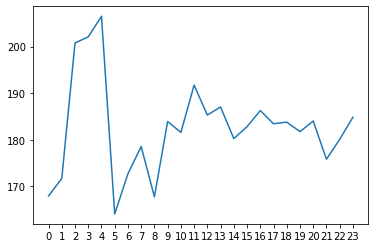

In [57]:
d1['time'] = d1['time'].apply(str)
plt.plot(d1['time'],d1['均单价'])

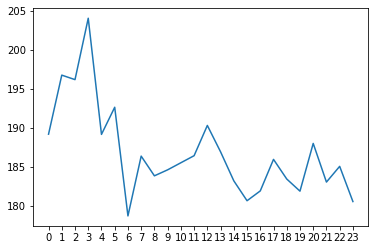

In [58]:
d2['time'] = d2['time'].apply(str)
plt.plot(d2['time'],d2['均单价'])

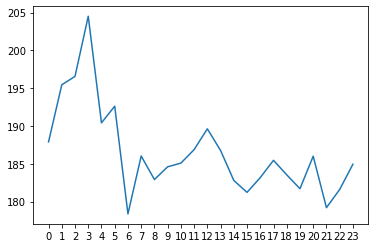

In [59]:
d3['time'] = d2['time'].apply(str)
plt.plot(d3['time'],d3['均单价'])

In [60]:
def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [61]:
a = drop_du(data,'商品分类')


In [62]:

order=sorted(a[1].items(),key=lambda x:x[1],reverse=True)
order

[('七夕特惠11专区\t', 30926),
 ('七夕特惠19专区\t', 8744),
 ('七夕特惠33专区\t', 6777),
 ('七夕预售玫瑰专区\t', 4148),
 ('邂逅推荐\t', 1494),
 ('满天星区\t', 727),
 ('生日祝福\t', 661),
 ('七夕特惠52专区\t', 589),
 ('高端礼盒\t', 568),
 ('小众鲜花\t', 420),
 ('太阳花区\t', 407),
 ('活动专区\t', 343),
 ('蓝色妖姬\t', 303),
 ('七夕特惠99专区\t', 200),
 ('康乃馨区\t', 196),
 ('节日折扣\t', 136),
 ('开业花篮\t', 90),
 ('邂逅推荐||节日折扣\t', 47),
 ('七夕11朵玫瑰款||七夕热销推荐专区\t', 45),
 ('未分类\t', 37),
 ('七夕特惠33专区||七夕33朵玫瑰款\t', 15),
 ('七夕特惠11专区||七夕11朵玫瑰款\t', 15),
 ('家居鲜花\t', 15),
 ('邂逅推荐||节日折扣||七夕预售玫瑰专区\t', 11),
 ('邂逅推荐||满天星区||七夕特惠11专区||活动专区||节日折扣\t', 8),
 ('七夕19朵玫瑰款||七夕热销推荐专区\t', 7),
 ('七夕特惠11专区||活动专区\t', 7),
 ('七夕特惠19专区||七夕19朵玫瑰款\t', 7),
 ('七夕鲜花\t', 7),
 ('预定鲜花\t', 5),
 ('爱之蔓推荐\t', 5),
 ('七夕流量爆款活动\t', 5),
 ('邂逅推荐||七夕特惠11专区\t', 4),
 ('邂逅推荐||七夕预售玫瑰专区\t', 4),
 ('邂逅推荐||七夕特惠19专区\t', 3),
 ('邂逅推荐||七夕特惠33专区||活动专区\t', 3),
 ('每周推荐\t', 3),
 ('七夕特惠52专区||七夕52朵玫瑰款\t', 3),
 ('七夕热销推荐专区||七夕33朵玫瑰款\t', 3),
 ('爱的纪念||生日祝福||七夕预售玫瑰专区\t', 3),
 ('七夕52朵玫瑰款||七夕热销推荐专区\t', 2),
 ('七夕33朵玫瑰款||七夕热销推荐专区\t', 2),
 ('七夕鲜

In [63]:
b = wenzi(data,'礼盒','商品名称')

关于“礼盒”的订单数量是： 23427


In [64]:
b =wenzi(data,'11','商品名称')

关于“11”的订单数量是： 35409


In [65]:
b =wenzi(data,'19','商品名称')

关于“19”的订单数量是： 9973


In [66]:
b =wenzi(data,'36','商品名称')

关于“36”的订单数量是： 1


In [67]:
b =wenzi(data,'粉玫瑰','商品名称')

关于“粉玫瑰”的订单数量是： 11616


In [68]:
b =wenzi(data,'红玫瑰','商品名称')

关于“红玫瑰”的订单数量是： 35707


In [69]:
b =wenzi(data,'花束','商品名称')

关于“花束”的订单数量是： 31400
